# ByoTrack fundamental features

## Loading a video 

In [1]:
import matplotlib.pyplot as plt
import cv2

from byotrack import Video, VideoTransformConfig

import skimage.io as iio
from byotrack.video.transforms import ChannelSelect, ChannelAvg, ScaleAndNormalize 
from PIL import Image

TEST = True  # Set to False to analyze a whole video

icy_path = "/home/noah/Documents/icy-2.4.2.0-all"
tifpath = '/home/noah/Desktop/cellsegtest/segTestNew/shortStack_adjusted'
video_patht = "/home/noah/Desktop/cellsegtest/segTestNew/shortStack_adjusted/camera2_NDTiffStack0000.tif"

In [2]:
#tiff loading test
#video is just a list/array of normalised frames

# vid = iio.ImageCollection(tifpath + '/*.tif').concatenate()
# print(type(vid))
# # vidcv = cv2.VideoCapture(vid, cv2.CAP_FFMPEG)
# vid2 = Image.open(video_patht)


from csbdeep.utils import normalize as csbdeepNormaliser
    
def Read_Data_TIFseq(vid_path):
    # positions = (pd.read_csv(csv_path,usecols=['TrackID','t','x','y'])).values
    vid = iio.ImageCollection(vid_path + '/*.tif').concatenate() #concatonate to numpyarray
    # red_vid = iio.ImageCollection(red_vid_path + '/*.tif')
    vid = vid.reshape(vid.shape[0], vid.shape[1], vid.shape[2], 1)
    normalisedVid = [csbdeepNormaliser(frame) for frame in vid]

    return vid

video = Read_Data_TIFseq(tifpath)

In [7]:
# Simply open a video

# video = Video(vidread)

fps = 7
# fps = video.reader.fps

# Note: video could also be a 4 dimensionnal numpy array

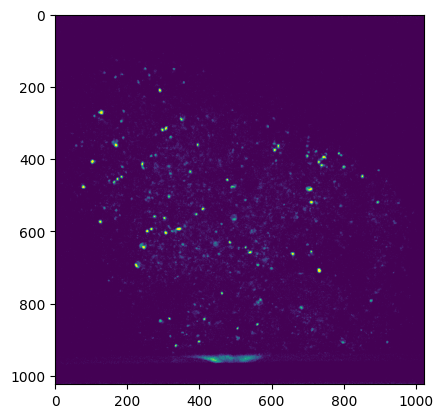

In [4]:
plt.imshow(video[0])

In [ ]:
# # A transform can be added to normalize and aggregate channels

# transform_config = VideoTransformConfig(aggregate=True, normalize=True, q_min=0.01, q_max=0.999)
# video.set_transform(transform_config)

# # Show the min max value used to clip and normalize
# print(video._normalizer.mini, video._normalizer.maxi)

In [ ]:
#video is just a list/array of normalised frames
# import skimage.io as iio
# from byotrack.video.transforms import ChannelSelect, ChannelAvg, ScaleAndNormalize 


# from csbdeep.utils import normalize as csbdeepNormaliser
    
# def Read_Data_TIFseq(vid_path):
#     # positions = (pd.read_csv(csv_path,usecols=['TrackID','t','x','y'])).values
#     vid = iio.ImageCollection(vid_path + '/*.tif').concatenate() #concatonate to numpyarray
#     # red_vid = iio.ImageCollection(red_vid_path + '/*.tif')
#     vid = vid.reshape(vid.shape[0], vid.shape[1], vid.shape[2], 1)
#     normalisedVid = [csbdeepNormaliser(frame) for frame in vid]

#     return vid

# video1 = Read_Data_TIFseq(tifpath)


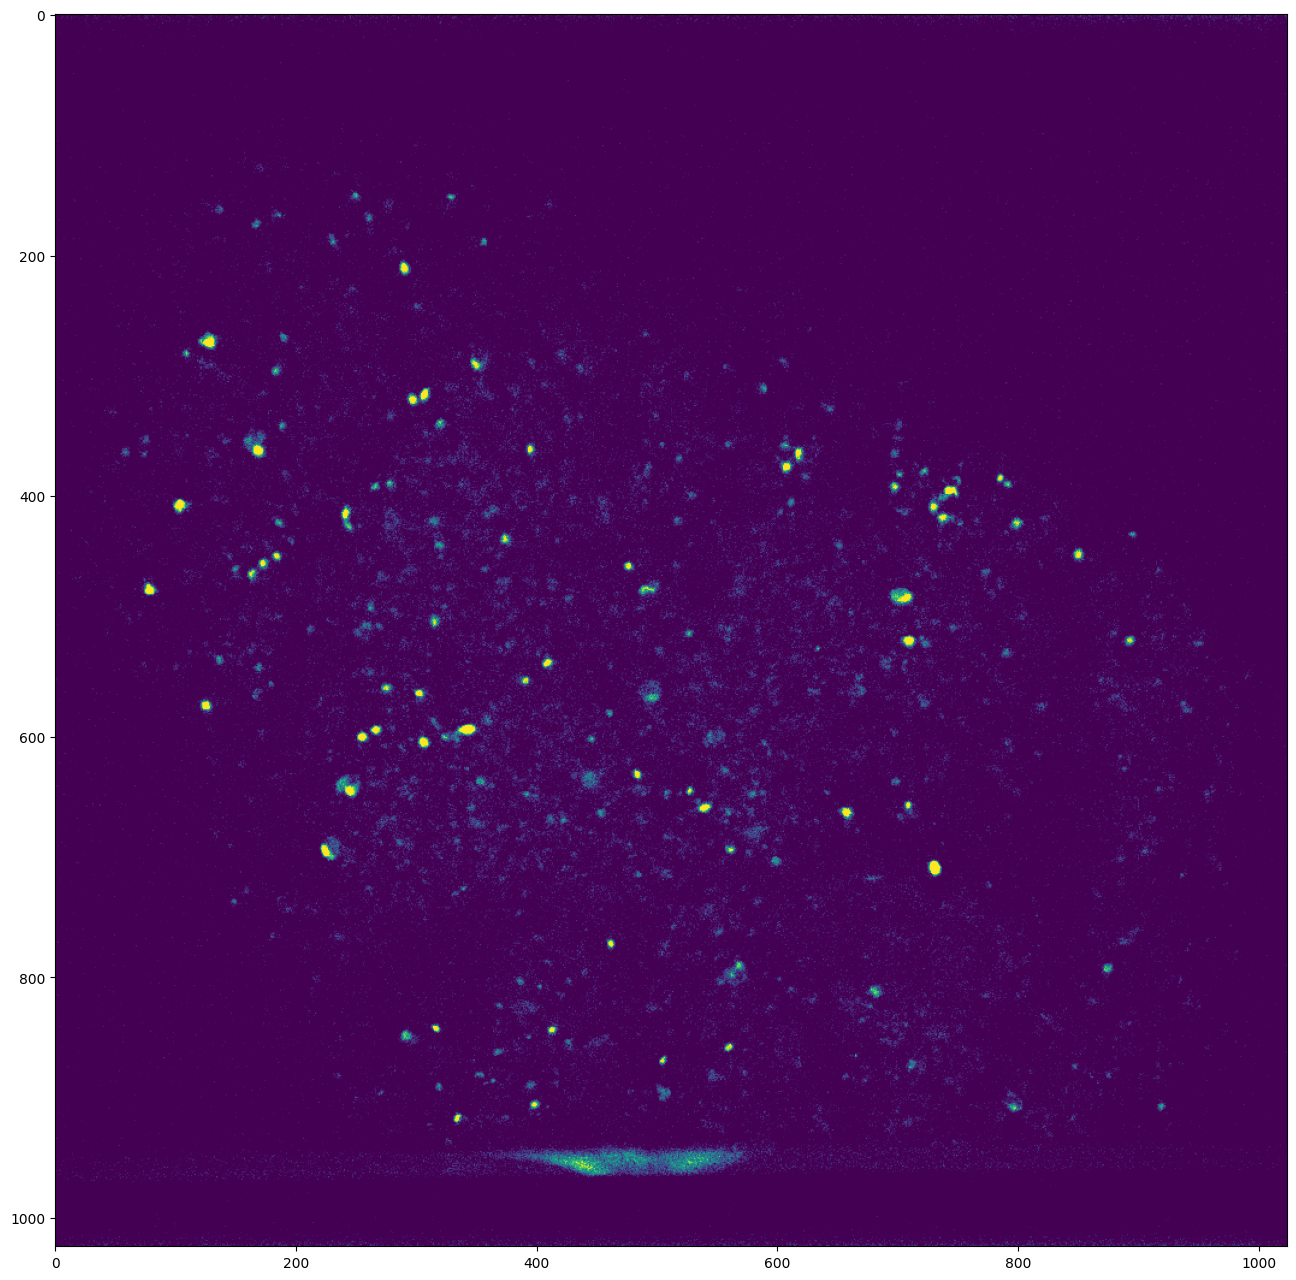

In [5]:
# Display the first frame

plt.figure(figsize=(24, 16), dpi=100)
plt.imshow(video[0])
plt.show()

In [8]:
# Visualisation of the whole video with opencv

for i, frame in enumerate(video):
    try:
        # Display the resulting frame
        cv2.imshow('Frame', frame)
        cv2.setWindowTitle('Frame', f'Frame {i} / {len(video)}')

        # Press Q on keyboard to  exit
        key = cv2.waitKey(1000 // fps) & 0xFF

        if key == ord('q'):
            break

        if cv2.getWindowProperty("Frame", cv2.WND_PROP_VISIBLE) <1:
            break
    except Exception as e:
        print(e)
        cv2.destroyAllWindows()

# Closes all the frames
cv2.destroyAllWindows()
#warning with opencv QOBject::moveToThread can be fixed: https://stackoverflow.com/questions/52337870/python-opencv-error-current-thread-is-not-the-objects-thread

QObject::moveToThread: Current thread (0x55e5765ad2d0) is not the object's thread (0x55e576758c20).
Cannot move to target thread (0x55e5765ad2d0)

QObject::moveToThread: Current thread (0x55e5765ad2d0) is not the object's thread (0x55e576758c20).
Cannot move to target thread (0x55e5765ad2d0)

QObject::moveToThread: Current thread (0x55e5765ad2d0) is not the object's thread (0x55e576758c20).
Cannot move to target thread (0x55e5765ad2d0)

QObject::moveToThread: Current thread (0x55e5765ad2d0) is not the object's thread (0x55e576758c20).
Cannot move to target thread (0x55e5765ad2d0)

QObject::moveToThread: Current thread (0x55e5765ad2d0) is not the object's thread (0x55e576758c20).
Cannot move to target thread (0x55e5765ad2d0)

QObject::moveToThread: Current thread (0x55e5765ad2d0) is not the object's thread (0x55e576758c20).
Cannot move to target thread (0x55e5765ad2d0)

QObject::moveToThread: Current thread (0x55e5765ad2d0) is not the object's thread (0x55e576758c20).
Cannot move to tar

## Detections on a video: Example of WaveletDetector

In [9]:
import numpy as np
import torch

from byotrack.implementation.detector.stardist import StarDistDetector
from byotrack.implementation.detector.wavelet import WaveletDetector

2023-06-25 20:47:41.595721: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-25 20:47:41.617601: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 20:47:42.076666: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
# detector = WaveletDetector(scale=1, k=3.0, min_area=3, batch_size=20, device=torch.device("cpu"))

In [ ]:


# Run the detection process on the current video

# if TEST:  # Use slicing on video to run detection only on a part of it
#     detections_sequence = detector.run(video[:50])
# else:
#     detections_sequence = detector.run(video)



In [ ]:
# detections_sequence

In [ ]:
# segmentation = detections_sequence[0].segmentation.clone()
# segmentation[segmentation!=0] += 50  # Improve visibility of firsts labels

# plt.figure(figsize=(24, 16), dpi=100)
# plt.imshow(segmentation)
# plt.show()

In [10]:
# Create the detector object with its hyper parameters
model_path = "/home/noah/Desktop/STARDIST_CONFOCAL/NEWEST TdT MODELS/10X_IMAGES_ONLY"
detector = StarDistDetector(model_path, batch_size=5)
# detector = StarDistDetector(scale=1, k=3.0, min_area=3, batch_size=20, device=torch.device("cpu"))

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.592132, nms_thresh=0.3.


stardist.py (41): Current implementation do not support batch size greater than 1 and will iterate image by image
2023-06-25 20:47:48.722580: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-25 20:47:48.722843: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [ ]:
# detector_wave = WaveletDetector(scale=1, k=3.0, min_area=3, batch_size=20, device=torch.device("cpu"))

In [43]:
frame = video[0]
cut1 = frame[None, ...]
cut2 = frame[None]
print(np.array_equal(cut1, cut2))
# none adds a new axis in numpy ? no need for ellipsis though - arrays are equal
#new axis needs to be added for batch function in stardist. this should get cleaned up later
print(frame.shape)
print(frame[None].shape)
print((cut2.shape))


True
(1024, 1024, 1)
(1, 1024, 1024, 1)
(1, 1024, 1024, 1)


In [ ]:
# Run the detection process on the current video

#my implementation of this is slow af
# detections_sequence = [list(detector.detect(frame[None, ...])) for frame in video] #why frame[None, ...] needed?
detections_sequence = [list(detector.detect(frame[None])) for frame in video] #why frame[None, ...] needed?

# if TEST:  # Use slicing on video to run detection only on a part of it
#     detections_sequence = detector.run(video[:50])
# else:
#     detections_sequence = detector.run(video)

In [ ]:
detections_sequence[0][0][0]

In [ ]:
# Display the first detections

segmentation = detections_sequence[4][0][0].segmentation.clone()
segmentation[segmentation!=0] += 50  # Improve visibility of firsts labels

plt.figure(figsize=(24, 16), dpi=100)
plt.imshow(segmentation)
plt.show()

In [ ]:
detections_sequence[3][0][0]

In [ ]:
# Display the detections with opencv
# Use w and x to move backward/forward in the video

i = 0
while True:
    try:
        mask = (detections_sequence[i][0][0].segmentation.numpy() != 0).astype(np.uint8) * 255
        # Display the resulting frame
        cv2.imshow('Frame', mask)
        cv2.setWindowTitle('Frame', f'Frame {i} / {len(detections_sequence)} - Number of detections: {len(detections_sequence[i])}')
        # Press Q on keyboard to  exit
        key = cv2.waitKey() & 0xFF

        if key == ord('q'):
            break

        if cv2.getWindowProperty("Frame", cv2.WND_PROP_VISIBLE) <1:
            break

        if key == ord("a"):
            i = (i - 1) % len(detections_sequence)

        if key == ord("d"): #x is a keyboard shortcut for deleting cells - swapped to a
            i = (i + 1) % len(detections_sequence)
    except Exception as e:
        print(e)
        cv2.destroyAllWindows()
        break
    
cv2.destroyAllWindows()

In [ ]:
# Set hyperparameters manually on the video
# Use w/x to move backward/forward in the video
# Use c/v to update k (the main hyperparameter)
# You can restard with another scale/min_area


i = 0
prob_speed = 0.1
nms_speed = 0.2
while True:
    try:
        frame = video[i]
        detections = detector.detect(frame[None, ...])[0][0]
        print(detections)
        mask = (detections.segmentation.numpy() != 0).astype(np.uint8) * 255
        print('a')
        # Display the resulting frame
        cv2.imshow('Frame', mask)
        cv2.setWindowTitle('Frame', f'Frame {i} / {len(video)} - prob={detector.prob_threshold}, nms={detector.nms_threshold} - Num detections: {detections.length}')
        print('b')
        # Press Q on keyboard to  exit
        key = cv2.waitKey() & 0xFF

        if key == ord('q'):
            break

        if cv2.getWindowProperty("Frame", cv2.WND_PROP_VISIBLE) <1:
            break

        if key == ord("a"):
            i = (i - 1) % len(video)

        if key == ord("d"):
            i = (i + 1) % len(video)

        if key == ord("c"):
            detector.prob_threshold = detector.prob_threshold * (1 - prob_speed)

        if key == ord("v"):
            detector.prob_threshold = detector.prob_threshold * (1 + prob_speed)

        if key == ord("b"):
            detector.nms_threshold = detector.nms_threshold * (1 - nms_speed)

        if key == ord("n"):
            detector.nms_threshold = detector.nms_threshold * (1 + nms_speed)

    except Exception as e:
        print(e)
        cv2.destroyAllWindows()
        break

cv2.destroyAllWindows()

## Link detections: Example of IcyEMHTLinker

In [ ]:
from byotrack import Track
from byotrack.implementation.linker.icy_emht import IcyEMHTLinker

In [ ]:
# Create the linker object with icy path
# This Linker requires to install Icy software first

linker = IcyEMHTLinker(icy_path)

In [ ]:
# You can set the expected motion of particles

linker.motion = linker.Motion.BROWNIAN  # Already by default

In [ ]:
# from typing import Sequence
# print(type(video))
# vidinst = Video(Sequence[np.asarray(video)])

In [ ]:
seqlist = [detections[0][0] for detections in detections_sequence]
type(seqlist)

In [ ]:
len(video)

In [ ]:
# Run the linker given a video (Unused) and detections

#note: icy cannot be running at the same time as the bridge is open

if TEST:  # Use slicing to run linker only on a part of the data
    tracks = linker.run(video, detections_sequence)
else:
    tracks = linker.run(video, detections_sequence[:][0][0])

In [ ]:
# Visualize tracks existence in time

# Transform into tensor
tracks_tensor = Track.tensorize(tracks)
print(tracks_tensor.shape)  # N_frame x N_track x D

mask = ~ torch.isnan(tracks_tensor).any(dim=2)

plt.figure(figsize=(24, 16), dpi=100)
plt.xlabel("Track id")
plt.ylabel("Frame")
plt.imshow(mask)
plt.show()

In [ ]:
# Visualize tracks with opencv
# Use w/x to move backward/forward in the video (or space to run the video)
# Use c to display also the detections on the frame

fps = 20
running = False
display_detections = False

frame_id = 0

while True:
    frame_id += running
    frame = (video[frame_id] * 255).astype(np.uint8)
    if display_detections and frame_id < len(detections_sequence):
        mask = (detections_sequence[frame_id].segmentation.numpy() != 0).astype(np.uint8) * 255
        frame = np.concatenate((mask[..., None], frame, np.zeros_like(frame)), axis=2)
    else:
        frame = np.concatenate((np.zeros_like(frame), frame, np.zeros_like(frame)), axis=2)

    # Add tracklets
    for track in tracks:
        point = track[frame_id]
        if torch.isnan(point).any():
            continue

        x, y = point.round().to(torch.int).tolist()

        color = (0, 0, 255)  # Red

        cv2.circle(frame, (x, y), 5, color)
        cv2.putText(frame, str(track.identifier % 10), (x + 4, y - 4), cv2.FONT_HERSHEY_SIMPLEX, 0.3, color)

    # Display the resulting frame
    cv2.imshow('Frame', frame)
    cv2.setWindowTitle('Frame', f'Frame {frame_id} / {len(video)}')

    # Press Q on keyboard to  exit
    key = cv2.waitKey(1000 // fps) & 0xFF

    if key == ord('q'):
        break

    if cv2.getWindowProperty("Frame", cv2.WND_PROP_VISIBLE) <1:
        break

    if key == ord(" "):
        running = not running

    if not running and key == ord("w"):  # Prev
        frame_id = (frame_id - 1) % len(video)

    if not running and key == ord("x"):  # Next
        frame_id = (frame_id + 1) % len(video)
        
    if key == ord("c"):
        display_detections = 1 - display_detections

# Closes all the frames
cv2.destroyAllWindows()

## Tracks refinement: Example of Cleaner, followed by EMC2 Stitcher

In [ ]:
from byotrack.implementation.refiner.cleaner import Cleaner
from byotrack.implementation.refiner.stitching import EMC2Stitcher

In [ ]:
# Split tracks with consecutive dist > 3.5
# Drop tracks with length < 5

cleaner = Cleaner(min_length=5, max_dist=3.5)
tracks = cleaner.run(video, tracks)

In [ ]:
# Visualize tracks existence in time

# Transform into tensor
tracks_tensor = Track.tensorize(tracks)
print(tracks_tensor.shape)  # N_frame x N_track x D

mask = ~ torch.isnan(tracks_tensor).any(dim=2)

plt.figure(figsize=(24, 16), dpi=100)
plt.xlabel("Track id")
plt.ylabel("Frame")
plt.imshow(mask)
plt.show()

In [ ]:
# Stitch tracks together in order to produce coherent track on all the video

stitcher = EMC2Stitcher(eta=5.0)  # Don't link tracks if they are too far (EMC dist > 5 (pixels))
tracks = stitcher.run(video, tracks)

In [ ]:
# Visualize tracks existence in time

# Transform into tensor
tracks_tensor = Track.tensorize(tracks)
print(tracks_tensor.shape)  # N_frame x N_track x D

mask = ~ torch.isnan(tracks_tensor).any(dim=2)

plt.figure(figsize=(24, 16), dpi=100)
plt.xlabel("Track id")
plt.ylabel("Frame")
plt.imshow(mask)
plt.show()

## End-to-end tracking: Example of MultiStepTracker

In [ ]:
from byotrack import MultiStepTracker

In [ ]:
# Create all the steps: Detector, Linker[, Refiner]
# Then the tracker

detector = WaveletDetector(scale=1, k=3, min_area=3.0, batch_size=20, device=torch.device("cpu"))
linker = IcyEMHTLinker(icy_path)

# Optional refiner
refiners = []
if True:
    refiners = [Cleaner(5, 3.5), EMC2Stitcher(eta=5.0)]

tracker = MultiStepTracker(detector, linker, refiners)

In [ ]:
if TEST:  # Use slicing on video to run tracker only on a part of it
    tracks = tracker.run(video[:50])
else:
    tracks = tracker.run(video)

In [ ]:
# Visualize tracks existence in time

# Transform into tensor
tracks_tensor = Track.tensorize(tracks)
print(tracks_tensor.shape)  # N_frame x N_track x D

mask = ~ torch.isnan(tracks_tensor).any(dim=2)

plt.figure(figsize=(24, 16), dpi=100)
plt.xlabel("Track id")
plt.ylabel("Frame")
plt.imshow(mask)
plt.show()

In [ ]:
# Visualize tracks with opencv
# Use w/x to move backward/forward in the video (or space to run the video)
# Use c to display also the detections on the frame

fps = 20
running = False
display_detections = False

frame_id = 0

while True:
    frame_id += running
    frame = (video[frame_id] * 255).astype(np.uint8)
    if display_detections and frame_id < len(detections_sequence):
        mask = (detections_sequence[frame_id].segmentation.numpy() != 0).astype(np.uint8) * 255
        frame = np.concatenate((mask[..., None], frame, np.zeros_like(frame)), axis=2)
    else:
        frame = np.concatenate((np.zeros_like(frame), frame, np.zeros_like(frame)), axis=2)

    # Add tracklets
    for track in tracks:
        point = track[frame_id]
        if torch.isnan(point).any():
            continue

        x, y = point.round().to(torch.int).tolist()

        color = (0, 0, 255)  # Red

        cv2.circle(frame, (x, y), 5, color)
        cv2.putText(frame, str(track.identifier % 10), (x + 4, y - 4), cv2.FONT_HERSHEY_SIMPLEX, 0.3, color)

    # Display the resulting frame
    cv2.imshow('Frame', frame)
    cv2.setWindowTitle('Frame', f'Frame {frame_id} / {len(video)}')

    # Press Q on keyboard to  exit
    key = cv2.waitKey(1000 // fps) & 0xFF

    if key == ord('q'):
        break

    if cv2.getWindowProperty("Frame", cv2.WND_PROP_VISIBLE) <1:
        break

    if key == ord(" "):
        running = not running

    if not running and key == ord("w"):  # Prev
        frame_id = (frame_id - 1) % len(video)

    if not running and key == ord("x"):  # Next
        frame_id = (frame_id + 1) % len(video)
        
    if key == ord("c"):
        display_detections = 1 - display_detections

# Closes all the frames
cv2.destroyAllWindows()